## Special Skript for the 20220412 emergence experiment

## Summerize Data

In [1]:
%load_ext autoreload
%autoreload 2
from evaluation_scripts.experiment_class import Experiment
from evaluation_scripts.style import Style
from evaluation_scripts.oneway import OneWaySignificance
import matplotlib.pyplot as plt
import pandas as pd
import os
from matplotlib.ticker import MaxNLocator


date = "20220412"
t_start = 4


experiment = Experiment(date)
Data = experiment.data[experiment.data.transfer_n >= t_start]
epsilon = 0.001
fontsize = 20
style = Style(figsize = (18,6), fontsize = fontsize)


<Figure size 1800x600 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt

def add_panel_letter(ax, letter, fontsize, family = "serif", x_offset=-.52, y_offset=-0.07, weight='bold'):
    # Get title position and adjust for alignment with the panel letter
    title = ax.get_title()
    title_position = ax.title.get_position()
    
    # Set the position for the panel letter
    ax.text(
        title_position[0] + x_offset, title_position[1] + y_offset, letter,
        transform=ax.transAxes,
        fontsize=fontsize,
        family = family,
        fontweight=weight,
        va='bottom',
        ha='right'
    )

## load expectations

In [3]:
exp = pd.read_pickle(os.path.join(experiment.pathes["obj"], "expectations_emergence.pkl"))

df = Data[Data.x.isin(["A&B"])].copy()
df["double"] = df.phenotype == "AB_r"
cols = ["strategy", "transfer_n", "double"]
summ = df[cols].groupby(cols[:-1]).sum().unstack().fillna(0).stack()
summ["f"] = summ/376
summary = summ.reset_index()

In [4]:
from figures import Figure, styles
figure = Figure(styles["paper"])

/var/folders/f7/ks4rl3915yj6crhznly5p28h0000gq/T/ipykernel_19764/2304492003.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


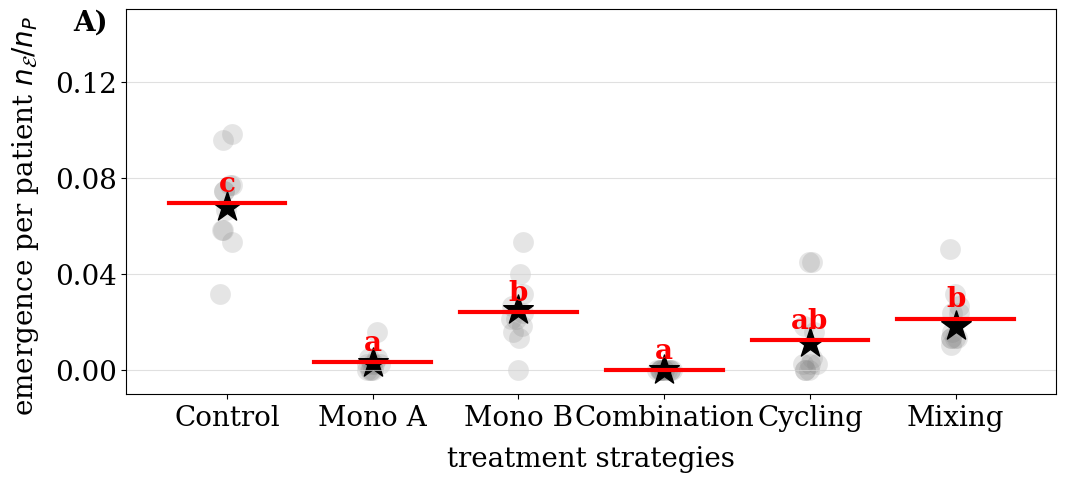

In [17]:
_, ax = style.create_figure_with_style(figsize = (12, 5))
emergence = OneWaySignificance(summary, "strategy", "f")
ax = emergence.plot(dot_color = "grey", strip = True, swarm = False,  order = experiment.strategies, ax = ax, jitter =.05, violin = False)

ax.scatter(experiment.strategies, exp.loc[experiment.strategies, "f"], marker = "*", color = "black", s = 500)

ax.set_ylabel(r"emergence per patient $n_\mathcal{E}/n_P$    ")
ax.set_xlabel("treatment strategies")

add_panel_letter(ax, "A)", fontsize)

ax.yaxis.set_major_locator(MaxNLocator(4))
ax.grid(True, which='major', axis='y', linestyle='-', color='lightgrey', alpha=0.7)

# Get the current x-tick labels
xticks = ax.get_xticks()
xtick_labels = [label.get_text() for label in ax.get_xticklabels()]
new_labels = ["Control" if label == "No treatment" else label for label in xtick_labels]
ax.set_xticklabels(new_labels)
ax.set_ylim([-.01, .15])

figure.format_ticks(ax, fontsize = fontsize)
figure.format_labels(ax, fontsize = fontsize)
figure.format_title(ax, fontsize = fontsize)

#plt.savefig(os.path.join(experiment.pathes["analysis"], "f_emergence_anova.pdf"), format='pdf', dpi = 300)
experiment.save_figure("f_emergence_anova.pdf")
emergence.write_anova_results(os.path.join(experiment.pathes["tables"], "emergence_anova.tex"))
emergence.write_tukey_results(os.path.join(experiment.pathes["tables"], "emergence_tukey.tex"))

In [5]:
exp

,f
No treatment,0.068075
Mono A,0.003213
Mono B,0.025131
Mixing,0.018244
Combination,0.000000
Cycling,0.011407
